---
# ***Argentina Programa 4.0 - Programación Avanzada con Python***
---

## **Módulo 6**: Librería Pandas - Series

### ***Universidad Nacional de Chilecito***

---


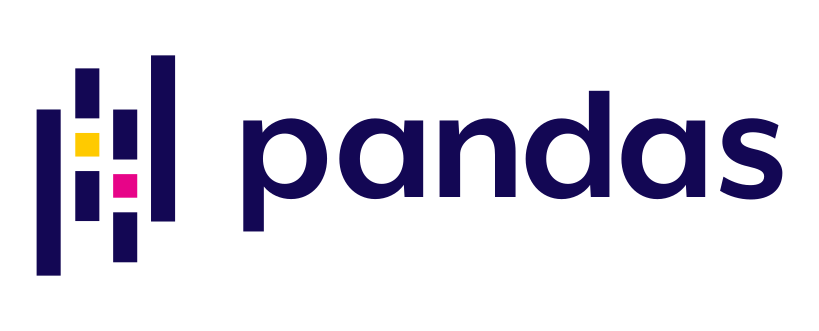

### Objetivos de la clase

- Aprender las bases de pandas: para qué sirve, cuáles son sus estructuras de datos y aplicaciones principales.

- Aprender las bases de `Series` y funcionalidades principales.

- Aplicar los conocimientos adquiridos de pandas en prácticas.

# Pandas

---

- **Colección de estructuras de datos y funciones** que facilitan el trabajo con datos estructurados.

- Nombre derivado de  "**Pan**el **Da**ta **S**ystem" (término econométrico para datasets multidimensionales).

- Construído **en base a Numpy**, inicialmente por Wes McKinney.

- Ofrece más versatilidad que Numpy: podemos trabajar con **datos de diferentes tipos** y podemos identificar las filas y columnas **usando etiquetas**, en lugar de solamente enteros.
    
- Combina la alta performance de las **operaciones sobre arrays de NumPy con la flexibilidad en la manipulación de datos** de un spreadsheet o una base de datos relacional.

- Provee **funcionalidades de indexación avanzadas** para facilitar la manipulación, agregación y selección de partes de un dataset.

- Provee **operaciones de agrupación por columnas, filtros y sumarizaciones**.

- Estas características hacen de pandas una librería **indispensable para las tareas de limpieza y preprocesamiento de datos**.


# Estructuras de datos de Pandas

---

Veremos los siguientes objetos:

* Series

* DataFrames




## Series
---



Una Series es un objeto similar a un vector **unidimensional**.

Contiene un **array de valores** (que en este caso son Perro, Oso, Jirafa, ...) y un **array de etiquetas** asociados a estos valores **denominado índice** (que en este caso son numéricos: 0, 1, 2, ...).

Cuando no especificamos un índice para los datos, se asigna por default un índice formado por valores enteros de 0 a N-1, donde N es la cantidad de valores en la serie.

Los valores de la serie pueden ser de cualquier tipo de datos, pero todos **los valores de una serie deben coincidir en su tipo**.

Las etiquetas, además de numéricas, también pueden ser de tipo cadena de caracteres.

Una Serie también puede pensarse como un **diccionario de tamaño fijo** con sus claves numéricas (Index) ordenadas.

Al igual que  los arrays de NumPy, permiten pasar una **lista de elementos (índices) para seleccionar un subconjunto** de valores.



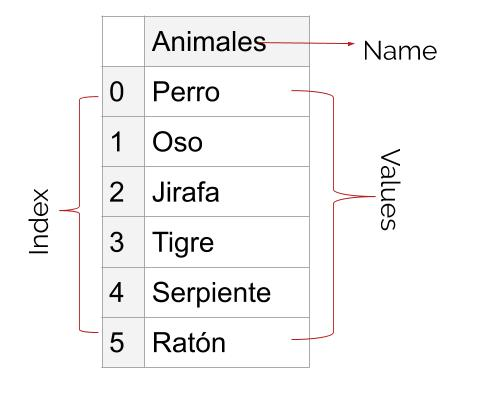


***Documentación***: https://pandas.pydata.org/pandas-docs/stable/reference/series.html

Entonces ¿qué diferencia una serie de  pandas de una instancia de numpy array unidimensional?

In [ ]:
import numpy as np
import pandas as pd

### Objetos `Series` en Pandas
---
* Puede pensarse como una array de una sola dimensión indexado.
* Puede ser creado desde una lista:

In [ ]:
lista = [0.25, 0.5, 0.75, 1.0]
data = pd.Series(lista)
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Los valores de la serie se obtienen con:

In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

El índice de la serie se obtiene con:

In [ ]:
data.index

RangeIndex(start=0, stop=4, step=1)

Podemos acceder a los valores de los elementos de una serie usando el índice asociado a esos elementos, de forma similar a los arrays de Numpy: con los `[]`

In [ ]:
data[1]

0.5

In [ ]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### `Series` como generalización de un array de NumPy
---


* La diferencia esencial con un array de Numpy es que el array tiene un índice entero *implícitamente definido*, mientras que un objeto `Series` de Pandas tiene un índice asociado a los valores *que está definido de forma explícita*.

* El índice explícito no tiene por qué ser de tipo entero y **sus valores pueden no ser únicos**, es decir tener repeticiones.


Creemos una instancia de `Series`:

In [ ]:
valores =   [0.25, 0.5 , 0.75, 1.0]
etiquetas = ['a' , 'b' , 'c' , 'd']
etiquetas_num = [2, 5, 3, 1]
data1 = pd.Series(valores, index=etiquetas)
data2 = pd.Series(valores, index=etiquetas_num)
print(data1)
print(data2)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
2    0.25
5    0.50
3    0.75
1    1.00
dtype: float64


Miremos el valor del segundo elemento usando su etiqueta:

In [ ]:
print(data1['b'])
print(data2[5])

0.5
0.5


Y repitamos usando su posición:

In [ ]:
print(data1[1])
print(data2[1])

0.5
1.0


Esperábamos que `print(data2[1])`devolviera `0.50` que es el segundo elementos de data2

*¿Qué pasó? ¿Qué hicimos mal? ¿Cómo se resuelve este problema?*





Vamos a ver ahora las properties `loc` e `iloc`

`iloc` recibe como parámetro la posición y `loc` recibe como parámetro la etiqueta

Como ayuda memoria pensemos `iloc` como integer-location: indexamos con enteros que representan la posición.

Vamos a ver entonces qué obtenemos como segundo elemento con estas properties:

In [ ]:
print(data1.iloc[1])
print(data2.iloc[1])

0.5
0.5


In [ ]:
print(data1.loc['b'])
print(data2.loc[5])

0.5
0.5



### `Series` como un `dict` especializado
Un `dict` es una estructura de datos que mapea un conjunto de keys arbitrarias a un conjunto de valores.

La analogía entre una instancia de `Series` y una de `dict` es inmediata. Puede crearse una instancia de `Series` a partir de un `dict` donde las keys del diccionario serán el índice de la instancia de Series.


In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)

print('instancia de diccionario: ')
print(population_dict)
print('---')
print('instancia de series: ')
print(population)

instancia de diccionario: 
{'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135}
---
instancia de series: 
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


Miramos el valor de población en California con la misma sintaxis para `Series` y `dict`:

In [ ]:
print(population['California'])
print(population_dict['California'])

38332521
38332521


A diferencia de un `dict` una instancia de `Series` soporta algunas operaciones del estilo de un numpy array como, por ejemplo, slicing.

*¿Recuerdan qué pasa con los límites en slicing en arrays?*


Veamos un ejemplo de slicing en una instancia de Series (notar que en este caso el endpoint es inclusivo):   

In [ ]:
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

Si usamos el index implícito, el endpoint **no** se incluye en el slicing:

In [ ]:
population[0:3]

California    38332521
Texas         26448193
New York      19651127
dtype: int64

Otro ejemplo:

In [ ]:
states_list = ['Illinois','Texas','New York', 'Florida', 'California']
states_pop = [12882135, 26448193, 19651127, 19552860, 38332521]
states = pd.Series(states_pop, index= states_list)
states['Illinois':'New York']

Illinois    12882135
Texas       26448193
New York    19651127
dtype: int64

### Información complementaria sobre `Series`
---

Podemos construir instancias de `Series` a partir de:

1) una lista o un array de `Numpy`:

In [ ]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

2) un escalar repetido a lo largo de un índice:

In [ ]:
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

3) un diccionario:

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

Y en todos los casos podría usarse un índice explícitamente definido:

In [ ]:
pd.Series([2, 4, 6], index=[3, 2, 2])

3    2
2    4
2    6
dtype: int64

In [ ]:
tmp = pd.Series({2:'a', 1:'b', 3:'c'},  index=[3, 2, 2, 1])

In [ ]:
tmp

3    c
2    a
2    a
1    b
dtype: object


#### Selección de datos en Series

Vamos a ver ahora distintas formas de seleccionar elementos en instancias de `Series`

Comencemos creando el objeto `data`:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

##### `Series` como array de una dimensión

Una instancia de `Series` provee una forma de seleccionar datos análoga a la de arrays. Podemos usar _slices_, _masking_ y _fancy indexing_.

##### Slicing explícito

Cuando hacemos slicing explícito (`data['a':'c']`) el índice final es incluido en el slice


In [ ]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

##### Slicing implícito por posición (enteros)

Cuando hacemos slicing implícto (`data[0:2]`) el índice final **NO** es incluido en el slice

In [ ]:
data[0:2]

a    0.25
b    0.50
dtype: float64

##### Boolean masking:

In [ ]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

##### Fancy indexing:

In [ ]:
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [ ]:
data[['a', 'e', 'e', 'b']]

a    0.25
e    1.25
e    1.25
b    0.50
dtype: float64


####  Indexers: loc e iloc

`loc` e `iloc` son propeties que nos permiten acceder a los elementos de una instancia de `Series` por ubicación o valor de index:


##### loc
***Documentación***: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html

Accedemos a un grupo de elementos por etiqueta(s) o array de booleanos

In [ ]:
data.loc['a']

In [ ]:
data.loc['a':'c']

In [ ]:
filtro = [True, False, False, True, False]
print(data)
print(data.loc[filtro])

- ¿Qué pasa si filtro tiene más elementos que la cantidad de filas de data?
- ¿Qué pasa si filtro tiene menos elementos que la cantidad de filas de data?

##### iloc

***Documentación***: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html

Accedemos a un grupo de elementos únicamente por posición (números enteros).


In [ ]:
data.iloc[1]

In [ ]:
data.iloc[0:3]

In [ ]:
posiciones = [0, 2, 3]
data.iloc[posiciones]

In [ ]:
posiciones = [0, 2, 4]
data.iloc[posiciones]

---

#### Referencias

Python for Data Analysis. Wes McKinney. Cap 5

https://pandas.pydata.org/docs/getting_started/
